<a href="https://colab.research.google.com/github/jugernaut/Numerico2021/blob/master/04_Interpolacion/00_SeriesDeTaylor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Series de Taylor
### Trabajo realizado con el apoyo del Programa UNAM-DGAPA-PAPIME PE101019
*   Autores: 
    - Luis M. de la Cruz Salas
*   Rev: mié nov 18 16:25:45 CST 2020

In [32]:
# COLAB
!git clone https://github.com/jugernaut/Numerico2021.git #rama  master
import Prometeo.Utils.gutils as vis
import numpy as np

Cloning into 'Numerico2021'...
remote: Enumerating objects: 211, done.
remote: Counting objects: 100% (211/211), done.
remote: Compressing objects: 100% (211/211), done.
remote: Total 2345 (delta 109), reused 0 (delta 0), pack-reused 2134
Receiving objects: 100% (2345/2345), 11.26 MiB | 2.72 MiB/s, done.
Resolving deltas: 100% (1482/1482), done.


## Introducción

En invierno buscamos nuestra comodidad térmica aislando nuestros cuerpos al cubrirlos con gruesos abrigos, de este modo minimizamos el área superficial expuesta a temperaturas bajas. Pero en verano, intentamos minimizar la ganancia de calor por radiación al permanecer en lugares sombreados. De igual manera, si usamos una cuchara de metal para mover nuestros alimentos mientras los calentamos en la estufa, sentiremos la cuchara caliente después de unos minutos, y si no tenemos cuidado podemos quemarnos la mano debido a que los metales son buenos transmisores del calor. Lo que estamos describiendo con estos ejemplos son casos cotidianos de la **transferencia de calor**. 

En el siguiente video, observamos como una barra de metal es expuesta a una fuente de calor en su extremo izquierdo y se representa con colores el aumento de la temperatura en toda la barra:

In [ ]:
# Si tiene acceso a red descomente las siguientes líneas para ver el video desde youtube
#from IPython.display import YouTubeVideo
#YouTubeVideo('gyCkL_9rGEk')

<video src="../../Videos/02_Conduccion1D.mp4" width="320" controls></video>

¿Será posible usar las matemáticas, específicamente las Series de Taylor, para estudiar como se transfiere el calor en diferentes circunstancias?

Para responder esta pregunta veamos que son las Series de Taylor y posteriormente intentemos resolver un problema de transferencia de calor con esta herramienta matemática.

## Un ejemplo de Series de Taylor

Algunas veces es necesario aproximar funciones complicadas usando una combinación de otras funciones más simples. Estas funciones más simples deberían permitir un tratamiento sencillo, por ejemplo encontrar sus derivadas o sus integrales. La pregunta es **¿qué tan bien se pueden aproximar las funciones complicadas con una combinación de funciones simples?** <br> <br>
Consideremos la función trigonométrica $\cos(x)$ en el intervalo $[-2\pi, 2\pi]$ cuya gráfica es la siguiente:

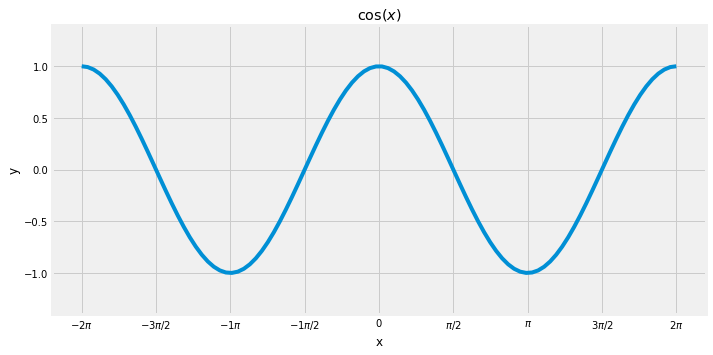

In [ ]:
x = np.linspace(-2*np.pi,2*np.pi,100) # Codominio de la función
y = np.cos(x)                         # Función coseno

# Definimos algunos parámetros para la gráfica
par = [{'title':'cos($x$)', 
        'xlabel':'x',
        'ylabel':'y'}]

# Inicializamos el plano Cartesiano
graf = vis.planoCartesiano(par=par)

#Realizamos la gráfica 
graf.plot(x = x, y = y)
graf.ticks(trig=True) # Se muestran las marcas en el eje x en múltiplos de pi
graf.limits(y=(-1,1))
graf.show()

¿Será posible aproximar la función $\cos(x)$ mediante un polinomio del tipo: $P(x) = c_0 + c_1 x + c_2 x^2 + c_3 x^3 + c_4 x^4 + \dots$? <br>

Para fijar ideas, intentemos aproximar el $\cos(x)$ en $x=0$. Sabemos que $\cos(0) = 1$. <br>

### Aproximación 0

Esta primera aproximación utiliza solo el término constante del polinomio, esto es: $P_0(x) = c_0$. Dado que se debe cumplir que $P_0(0) = \cos(0) = 1$ entonces $c_0 = 1$, es decir: $P_0(x) = 1$ <br>

¿Cómo se ve esta aproximación?

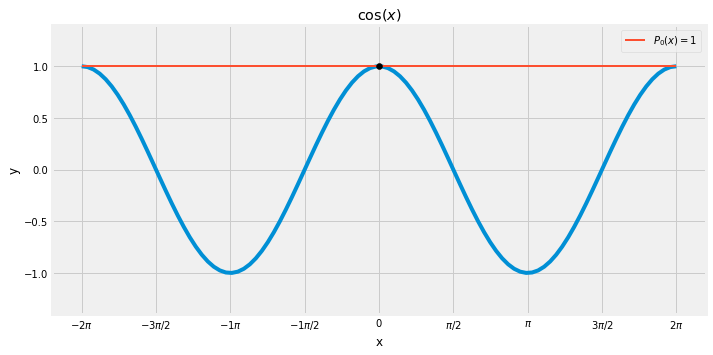

In [ ]:
P0 = lambda x : np.ones(len(x)) # Función que genera una lista de 1's.

# Lugar donde se desea aproximar
x0 = 0
y0 = np.cos(x0)

# Inicializamos el plano Cartesiano
graf = vis.planoCartesiano(par=par)

# Graficamos el coseno y la aproximación P0
graf.plot(x = x, y = y)
graf.plot(x = x, y = P0(x), par={'label':'$P_0(x) = 1$', 'lw':2})

# Dibujamos el punto donde se hace la aproximación x0
graf.scatter(x = x0, y=y0, par = {'marker':'o', 'color':'black', 'zorder':10})

graf.ticks(trig=True)
graf.limits(y=(-1,1))
graf.legend()
graf.show()

Observamos que solo hay unos puntos donde la función y el polinomio son iguales, particularmente en $x=0$ (punto negro). No parece ser una buena aproximación. <br> <br>
¿Cómo se podría tener una mejor aproximación.

### Aproximación 1

La respuesta a la pregunta anterior es: usando más términos en el polinomio. Usemos ahora el polinomio lineal: $P_1(x) = c_0 + c_1 x$ . <br>

Deseamos que $P_1(0) = \cos(0)$, entonces si evaluamos $P_1$ en $x=0$ obtenemos: $P_1(0) = c_0 + c_1 * 0 =  c_0$. 

Pero $P_1(0) = \cos(0) = 1$ entonces $c_0 = 1$, que es el mismo valor que habíamos obtenido en la aproximación anterior.

Sería muy bueno que tanto $P_1(x)$ como $\cos(x)$ también tuvieran la misma derivada en $x=0$, es decir $P_1^\prime(0) = \cos^\prime(0)$. 
- Calculemos la derivada y veamos que se puede obtener de esta condición:

$
\begin{array}{lclcc}
P_1(x) = c_0 + c_1 x& \approx & \cos(x) \\
P_1^\prime(x) = c_1 & \approx & -\sin(x)
\end{array}
$
- Ahora evaluamos en $x=0$:

$
\begin{array}{lclcc}
P_1(0) = c_0 + c_1 * 0 & = & \cos(0) = 1 & \Longrightarrow & c_0 = 1\\
P_1^\prime(0) = c_1 & = & -\sin(0) = 0 & \Longrightarrow & c_1 = 0 
\end{array}
$

Observamos de lo anterior que al evaluar $P_1(x)$ y $P_1^\prime(x)$ en $x=0$ obtenemos $c_0 = 1$ y $c_1 = 0$ respectivamente, por lo que el polinomio que se obtiene es el mismo que antes: $P_1(x) = 1$. Nuestra aproximación no mejoró ¿Por qué?

### Aproximación 2

Dado que la aproximación 1 no mejoró con respecto a la aproximación 0, vamos ahora a incluir en el polinomio un término de segundo grado: $P_2(x) = c_0 + c_1 x + c_2 x^2$

- Siguiendo la misma estrategia que antes podemos calcular la primera y segunda derivadas:

$
\begin{array}{lclcc}
P_2(x) = c_0 + c_1 x + c_2 x^2 & \approx & \cos(x) \\
P_2^\prime(x) = c_1 + 2 c_2 x  & \approx & -\sin(x) \\
P_2^{\prime\prime}(x) = 2 c_2  & \approx & -\cos(x)
\end{array}
$

- Evaluamos en $x=0$:

$
\begin{array}{lclcc}
P_2(0) = c_0 + c_1 * 0 + c_2 * 0^2 & = & \cos(0) = 1 & \Longrightarrow & c_0 = 1\\
P_2^\prime(0) = c_1 + 2 c_2 * 0 & = & -\sin(0) = 0 & \Longrightarrow & c_1 = 0 \\
P_2^{\prime\prime}(0) = 2 c_2  & = & -\cos(0) = -1 & \Longrightarrow & c_2 = -1/2 
\end{array}
$

En este caso las condiciones que se pidieron fueron:
- $P_2(0) = \cos(0)$, 
- $P_2^\prime(0) = \cos^\prime(0) = -\sin(x)$
- $P_2^{\prime\prime}(0) = \cos^{\prime\prime}(0)= -\cos(x)$, 

de tal manera que el polinomio de esta aproximación es: $P_2(x) = 1 - \frac{1}{2} x^2$

¿Es mejor esta aproximación? Veamos:

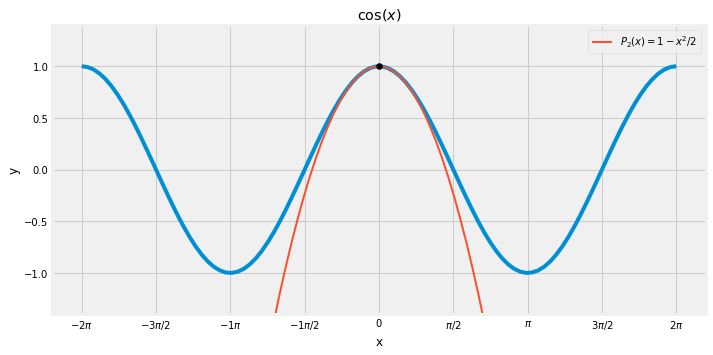

In [ ]:
# Construcción del polinomio de aproximación
c0 = 1
c1 = 0
c2 = -1/2
P2 = lambda x : c0 + c1 * x + c2 * x**2 # Evaluación del polinomio

# Inicializamos el plano Cartesiano
graf = vis.planoCartesiano(par=par)

# Graficamos el coseno y la aproximación P2
graf.plot(x = x, y = y)
graf.plot(x = x, y = P2(x), par={'label':'$P_2(x) = 1 - x^2/2$','lw':2})

# Dibujamos el punto donde se hace la aproximación x0
graf.scatter(x = x0, y=y0, par = {'marker':'o', 'color':'black', 'zorder':10})

graf.ticks(trig=True)
graf.limits(y=(-1,1))
graf.legend()
graf.show()

Observamos que esta aproximación es muy buena en una vecindad de $x=0$. 
Una manera de evaluar la diferencia entre $P_2(x)$ y $\cos(x)$ en un intervalo alrededor de $x=0$ es calculando la norma del error absoluto entre la aproximación y la función, es decir:

$\displaystyle Error = ||\hat{u} - u||$

donde $\hat{u}$ es la aproximación y $u$ es el valor exacto. Existen varias maneras de calcular la norma de un vector, para ello recomendamos que revises la notebook de normas en el directorio de Álgebra lineal. Calcularemos la norma Euclideana que se define como:

$\displaystyle Error = ||\hat{u}_i - u_i||_2 = \left[\sum_{i=1}^{N} (u_a(i) - u(i))^2 \right]^{1/2}$

donde $N$ es el número de puntos donde se realiza la comparación. Calculemos este error para la aproximación $P_2(x)$ en el intervalo $[-\pi/2, \pi/2]$ con $100$ puntos:

In [ ]:
# Definimos el intervalo xa = [-pi/2, pi/2] 
xa = np.linspace(-np.pi*0.5, np.pi*0.5, 100) # usamos N = 100 muestras para la comparación

# Calculamos la norma Euclideana del error para p2
Error_p2 = np.linalg.norm(P2(xa) - np.cos(xa), 2)
print('||P2(x) - cos(x)|| = {:10.8}'.format(Error_p2))

||P2(x) - cos(x)|| =  0.8216656


### Aproximación 3

Veamos si podemos mejorar la aproximación con un polinomio de grado 3: $P_3(x) = c_0 + c_1 x + c_2 x^2 + c_3 x^3$. <br>
En este caso, para encontrar los coeficientes imponemos las siguientes condiciones:

$
\begin{array}{lclcc}
P_3(x) = c_0 + c_1 x + c_2 x^2 + c_3 x^3 & \approx & \cos(x) \\
P_3^\prime(x) = c_1 + 2 c_2 x + 3 c_3 x^2 & \approx & -\sin(x) \\
P_3^{\prime\prime}(x) = 2 c_2 + 6 c_3 x & \approx & -\cos(x) \\
P_3^{\prime\prime\prime}(x) = 6 c_3  & \approx & \sin(x) \\
    \hline
P_3(0) = c_0 + c_1 * 0 + c_2 * 0^2 + c_3 * 0^3 & = & \cos(0) = 1 & \Longrightarrow & c_0 = 1\\
P_3^\prime(0) = c_1 + 2 c_2 * 0 + 3 c_3 * 0^2 & = & -\sin(0) = 0 & \Longrightarrow & c_1 = 0 \\
P_3^{\prime\prime}(0) = 2 c_2 + 6 c_3 * 0 & = & -\cos(0) = -1 & \Longrightarrow & c_2 = -1/2 \\   
P_3^{\prime\prime\prime}(0) = 6 c_3  & = & \sin(0) = 0 & \Longrightarrow & c_3 = 0 \\   
\end{array}
$

es decir, ahora las condiciones son para la función y su derivadas hasta la de tercer orden. Sustituyendo los coeficientes $c$'s antes calculados en el polinomio vemos que no hay cambios con respecto a la aproximación anterior: $P_3(x) = 1 - \frac{1}{2} x^2$ ¿Por qué?

Hagamos una aproximación con más términos.

### Aproximación 4

En esta aproximación usaremos un polinomio de grado 4: $P_4(x) = c_0 + c_1 x + c_2 x^2 + c_3 x^3 + c_4 x^4$

Con las siguientes condiciones:

$
\begin{array}{lclcc}
P_4(x) = c_0 + c_1 x + c_2 x^2 + c_3 x^3 + c_4 x^4 & \approx & \cos(x) \\
P_4^\prime(x) = 1 * c_1 + 2 * c_2 x + 3 * c_3 x^2 + 4 * c_4 x^3 & \approx & -\sin(x) \\
P_4^{\prime\prime}(x) = 1 * 2 * c_2 + 2 * 3 * c_3 x + 3 * 4 * c_4 x^2 & \approx & -\cos(x) \\
P_4^{\prime\prime\prime}(x) = 1 * 2 * 3 * c_3  + 2 * 3 * 4 * c_4 x & \approx & \sin(x) \\
P_4^{(4)}(x) = 1 * 2 * 3 * 4 * c_4 & \approx & \cos(x) \\
    \hline
P_4(0) = c_0 + c_1 * 0 + c_2 * 0^2 + c_3 * 0^3 + c_4 0^4 & = & \cos(0) = 1 & \Longrightarrow & c_0 = 1\\
P_4^\prime(0) = 1! * c_1 + 2 * c_2 *0 + 3 * c_3 * 0^2 + 4 * c_4 * 0^3 & = 
& -\sin(0) = 0 & \Longrightarrow & c_1 = \frac{0}{1!} \\
P_4^{\prime\prime}(0) = 2! * c_2 + 2 * 3 * c_3 * 0 + 3 * 4 * c_4 * 0^2 & = 
& -\cos(0) = -1 & \Longrightarrow & c_2 = \frac{-1}{2!} \\   
P_4^{\prime\prime\prime}(0) = 3! * c_3  + 2 * 3 * 4 * c_4 * 0 & = 
& \sin(0) = 0 & \Longrightarrow & c_3 = \frac{0}{3!} \\
P_4^{(4)}(x) = 4! * c_4 & = 
& \cos(0) = 1 & \Longrightarrow & c_4 = \frac{1}{4!} \\
\end{array}
$

Obsérvese que hemos puesto de manera explícita los coeficientes de multiplicación que se obtienen al momento de calcular las derivadas. 
Lo anterior es para darnos cuenta de que los coeficientes se calculan usando el factorial de un número. 
De esta manera, podemos escribir el polinomio como sigue:

$P_4(x) = c_0 + c_1 x + c_2 x^2 + c_3 x^3 + c_4 x^4 = 1 + \frac{0}{1!} x + \frac{-1}{2!} x^2 + \frac{0}{3!} x^3 + \frac{1}{4!} x^4 = 1 - \frac{1}{2!} x^2 + \frac{1}{4!} x^4$

Una cosa interesante que se puede notar es que los coeficientes de las aproximaciones anteriores se mantienen en el mismo valor, sin importar el grado del polinomio que se use.

Veamos que tan buena es esta última aproximación:

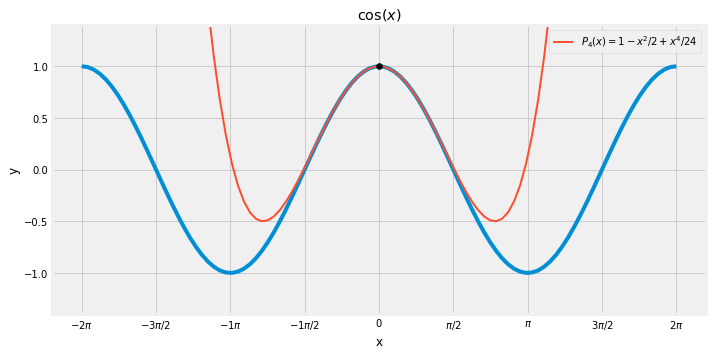

In [ ]:
# Construcción del polinomio de aproximación
c3 = 0
c4 = 1/24
P4 = lambda x : c0 + c2 * x**2 + c3 * x**3 + c4 * x**4 # Evaluación del polinomio

# Inicializamos el plano Cartesiano
graf = vis.planoCartesiano(par=par)

# Graficamos el coseno y la aproximación P4
graf.plot(x = x, y = y)
graf.plot(x = x, y = P4(x), par={'label':'$P_4(x) = 1 - x^2 / 2 + x^4 / 24$', 'lw':2})

# Dibujamos el punto donde se hace la aproximación x0
graf.scatter(x = x0, y=y0, par = {'marker':'o', 'color':'black', 'zorder':10})

graf.ticks(trig=True)
graf.limits(y=(-1,1))
graf.legend()
graf.show()

Observamos una mejor aproximación. Esto lo podemos comprobar calculando los errores para 
$P_2$ y $P_4$:

In [ ]:
# Calculamos la norma Euclideana del error para p4
Error_p4 = np.linalg.norm(P4(xa) - np.cos(xa), 2)

print('||P2(x) - cos(x)|| = {:10.8}'.format(Error_p2))
print('||P4(x) - cos(x)|| = {:10.8}'.format(Error_p4))

||P2(x) - cos(x)|| =  0.8216656
||P4(x) - cos(x)|| = 0.059051112


Nótese lo siguiente: 
- El error disminuyó con respecto a la aproximación con $P_2(x)$. 
- Los polinomios de grado impar no aportan mejoría, dado que las derivadas impares corresponden a la función $\sin(x)$ que al evaluarla en $x=0$ nos da un valor de cero, lo cual elimina el término impar del polinomio. 

Entonces, si queremos mejorar la aproximación de $P_4(x)$ deberíamos usar un polinomio de grado 6. El polinomio de grado 6 es:

$P_6(x) = 1 - \frac{1}{2!} x^2 + \frac{1}{4!} x^4 - \frac{1}{6!} x^6$

Se deja como ejercicio al estudiante que verifique que los coeficientes de $P_6$ están correctamente calculados. 

La gráfica de este último polinomio es la siguiente:

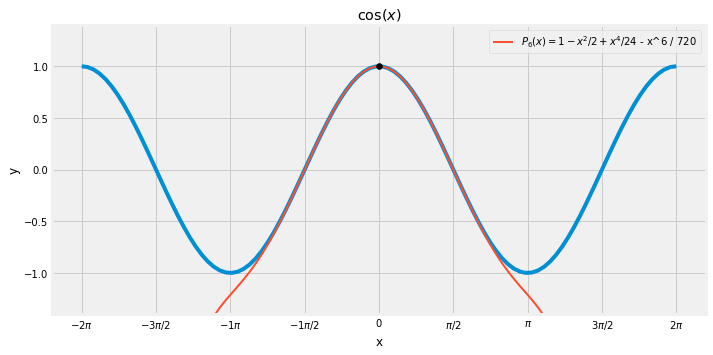

In [ ]:
# Construcción del polinomio de aproximación
c5 = 0
c6 = -1 / (1 * 2 * 3 * 4 * 5 * 6)
P6 = lambda x : c0 + c2 * x**2 + c4 * x**4 + c5 * x**5 + c6 * x**6

# Inicializamos el plano Cartesiano
graf = vis.planoCartesiano(par=par)

# Graficamos el coseno y la aproximación P4
graf.plot(x = x, y = y)
graf.plot(x = x, y = P6(x), 
          par={'label':'$P_6(x) = 1 - x^2 / 2 + x^4 / 24$ - x^6 / 720', 'lw':2})

# Dibujamos el punto donde se hace la aproximación x0
graf.scatter(x = x0, y=y0, par = {'marker':'o', 'color':'black', 'zorder':10})

graf.ticks(trig=True)
graf.limits(y=(-1,1))
graf.legend()
graf.show()

Los errores correspondientes para $P_2$, $P_4$ y $P_6$ son los siguientes:

In [ ]:
# Calculamos la norma Euclideana del error para P6
Error_p6 = np.linalg.norm(P6(xa) - np.cos(xa), 2)

print('||P2(x) - cos(x)|| = {:10.8}'.format(Error_p2))
print('||P4(x) - cos(x)|| = {:10.8}'.format(Error_p4))
print('||P6(x) - cos(x)|| = {:10.8}'.format(Error_p6))

Vemos que la aproximación con $P_6(x)$ es la mejor.

Grafiquemos todas las aproximaciones juntas:

In [ ]:
# Inicializamos el plano Cartesiano
graf = vis.planoCartesiano(par=par)

# Graficamos el coseno y junto con p0, p2, p4 y p6
graf.plot(x = x, y = y)
graf.plot(x=x, y=P0(x), 
          par={'label':'$P_0$', 'lw':2})
graf.plot(x=x, y=P2(x), 
          par={'label':'$P_2$ (Error = {:6.5f})'.format(Error_p2),'lw':2})
graf.plot(x=x, y=P4(x), 
          par={'label':'$P_4$ (Error = {:6.5f})'.format(Error_p4), 'lw':2})
graf.plot(x=x, y=P6(x), 
          par={'label':'$P_6$ (Error = {:6.5f})'.format(Error_p6), 'lw':2})

# Dibujamos el punto donde se hace la aproximación x0
graf.scatter(x = x0, y=y0, 
             par = {'marker':'o', 'color':'black', 'zorder':10})

graf.ticks(trig=True)
graf.limits(y=(-3,1))
graf.legend()
graf.show()

### Resumen

- Hemos visto como una función puede ser aproximada por una combinación lineal de otras funciones, en este caso por polinomios.
- Los polinomios son más fáciles de tratar, por ejemplo para calcular sus derivadas y sus integrales.
- Para calcular los coeficientes del polinomio de aproximación, la estrategia es que se cumplan las siguientes condiciones:
    + la función y el polinomio deben ser iguales cuando se evalúan en el punto donde se desea hacer la aproximación.
    + las derivadas de la función y las correspondientes derivadas del polinomio, deben ser iguales cuando se evalúan en el punto donde se desea hacer la aproximación.
- Por ejemplo, si se desea aproximar la función $f(x)$ en $x=0$ usando $P_3(x) = c_0 + c_1 x + c_2 x^2 + c_3 x^3$ imponemos las condiciones:

$
\begin{array}{ccc}
P_3(0) = f(0) & \text{ para obtener } & c_0 = f(0)\\
P_3^\prime(0) = f^\prime(0) & \text{ para obtener } & c_1 = f^\prime(0) / 1!\\
P_3^{\prime\prime}(0) = f^{\prime\prime}(0) & \text{ para obtener } & c_2 = f^{\prime\prime}(0) / 2!\\
P_3^{\prime\prime\prime}(0) = f^{\prime\prime\prime}(0) & \text{ para obtener } & c_3 = f^{\prime\prime\prime}(0) / 3!\\
\end{array}
$

- Por lo tanto, otra manera de escribir el polinomio es la siguiente:

$P_3(x) = f(0) + \dfrac{f^\prime(0)}{1!} x + \dfrac{f^{\prime\prime}(0)}{2!} x^2 + \dfrac{f^{\prime\prime\prime}(0)}{3!} x^3$ 

- Se puede comprobar fácilmente que si la aproximación se requiere hacer en un punto diferente de cero, digamos en $x = a$, el polinomio de tercer grado se escribe como:

$P_3(x) = f(a) + \dfrac{f^\prime(a)}{1!}(x-a) + \dfrac{f^{\prime\prime}(a)}{2!} (x-a)^2 + \dfrac{f^{\prime\prime\prime}(a)}{3!} (x-a)^3$ 

- La forma anterior se conoce como la serie (o polinomio) de Taylor de tercer grado alrededor de $a$ . 

- En general, una serie de Taylor de grado $n$ se escribe como:

$\displaystyle
P_n(x) = f(a) + f^\prime(a)(x-a) + f^{\prime\prime}(a)\frac{(x-a)^2}{2!} + \dots + f^{(n)}(a)\frac{(x-a)^n}{n!}
 = \sum_{i=0}^n f^{(i)}(a)\frac{(x-a)^i}{i!}$  <br> (recordemos que $0! = 1$)
 
 - Cuando $a = 0$ la serie de Taylor también se conoce como serie de Maclaurin.
 - **OJO**: Para que todo la anterior sea válido, se deben cumplir ciertas condiciones sobre la la función que se está aproximando, particularmente que todas las derivadas de $f(x)$ hasta la $n$-ésima existan y sean continuas.

## Herramienta interactiva

La siguiente herramienta permite evaluar de manera interactiva diferentes series de Taylor para algunas funciones. Puede elegir la función, el grado del polinomio de aproximación y el lugar donde se desea aproximar y observe el resultado.

In [33]:
# Google Coolab
%run "/content/Numerico2021/04_Interpolacion/zSeriesDeTaylor_interactive.ipynb"

# %run "/content/Prometeo/01_Calculo/07_Series_de_Taylor/zSeriesDeTaylor_interactive.ipynb"

interactive(children=(Dropdown(description='función', options=(cos(x), sin(x), tan(x), exp(x), exp(-x**2), exp…

<function __main__.calcTaylor>

## Teorema de Taylor

Este teorema nos dice básicamente qué tan grande es la diferencia entre la función $f(x)$ y su aproximación con una serie de Taylor $T_n(x)$ en un punto específico. El teorema se escribe como sigue:
***
Si tenemos una función $f(x)$ que tiene al menos $(n+1)$ derivadas continuas en un intervalo que contiene a $a$ y $x$, entonces:

$\displaystyle
f(x) = f(a) + f^\prime(a)(x-a) + f^{\prime\prime}(a)\frac{(x-a)^2}{2!} + \dots + f^{(n)}(a)\frac{(x-a)^n}{n!} + R_n(x)
 = T_n(x) + R_n(x)
$

donde $T_n(x)$ es el polinomio de grado $n$ de $f(x)$ y $R_n(x)$ se conoce como el error o el residuo.
***

### Forma del residuo $R_n(x)$:

Existen varias formas para expresar el residuo:

- Forma de Lagrange:
$\displaystyle
\boxed{R_n(x) = \frac{f^{(n+1)}(\xi)}{(n+1)!}(x-a)^{n+1}}
$
- Forma de Cauchy:
$\displaystyle
\boxed{R_n(x) = \frac{f^{(n+1)}(\xi)}{n!}(x-\xi)^{n}(x-a)}
$
- Forma Integral:
$\displaystyle
\boxed{R_n(x) = \int_{a}^{x} \frac{f^{(n+1)}(t)}{n!} (x-t)^n dt}
$

donde $\xi$ es un número real entre $x$ y $a$.

Estas tres formas no permiten calcular de manera sencilla el residuo por lo que en general se usa una cota, como se muestra a continuación:

Si $|f^{(n+1)}(x)| \leq M$ en el intervalo $(a-x, a+x)$ entonces el residuo es

$\displaystyle
\boxed{R_n(x) \leq \frac{M(x-a)^{n+1}}{(n+1)!}}
$

Usando esta desligualdad, se pueden hacer distintos tipos de aproximaciones.

### Ejemplo 1

Aproximar $e$ hasta 6 dígitos decimales.
***
**Recordemos lo siguiente**:
Si $p$ es una cantidad que deseamos aproximar mediante un número $q$, decimos que $q$ aproxima a $p$ hasta $k$ lugares decimales si la magnitud de la diferencia no es más grande que $5 \times 10^{-(k+1)}$, es decir: $\displaystyle |p - q| \leq 5 \times 10^{-(k+1)}$.
***
Primero escribimos la expansión en series de Taylor de la función $f(x)=e^x$ alrededor de $x=0$ :

$\displaystyle
T_n(x) = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \dots + \frac{x^n}{n!}
$

Usaremos el intervalo $(0,1)$ para acotar el residuo.

Sabemos que:
1. $e^0 = 1 = T_n(0)$
2. $e^1 = e \approx T_n(1)$
3. $e^\xi < e^x$ para $0 < \xi < x$

Usando la fórmula del residuo de Lagrange, primero debemos estimar $f^{(n+1)}(\xi) = e^\xi$. Hagamos la expansión de Taylor de primer orden alrededor de 0 junto con su residuo:

$\displaystyle
e^x  = T_1(x) + R_1(x) = 1 + x + \frac{e^\xi}{2!}x^2 
$

Dado que $e^\xi < e^x$ para $0 < \xi < x \leq 1$ entonces:

$\displaystyle
e^x  = 1 + x + \frac{e^\xi}{2!}x^2 < 1 + x + \frac{e^x}{2!}x^2 
\quad \Longrightarrow \quad 
e^x \leq 1 + x + \frac{e^x}{2!}x^2 \quad \text{para} \quad 0 \leq x \leq 1
$

de donde obtenemos:

$\displaystyle
\boxed{e^x \leq \frac{2 + 2x}{2 - x^2} \quad \text{para} \quad 0 \leq x \leq 1 }
$

Una gráfica de la función $\displaystyle \frac{2 + 2x}{2 - x^2}$ se puede ver en la siguiente figura:

In [ ]:
import matplotlib.pyplot as plt

xe = np.linspace(0,1,20) # Codominio de la función

# Graficamos la función
plt.plot(xe, (2 + 2*xe) / (2 - xe**2))

Observamos que $M = 4$ es una cota superior para $f^{(n+1)}(\xi) = e^\xi$ con $0 < \xi < 1$, por lo tanto el residuo es:

$\displaystyle
|R_n(x)| \leq \frac{M x^{n+1}}{(n+1)!} \leq \frac{4}{(n+1)!} \quad \text{para} \quad 0 \leq x \leq 1
$

Como se quiere aproximar con 6 dígitos decimales, entonces debemos encontrar una $n$ que satisfaga la siguiente condición: 

$\displaystyle
\frac{4}{(n+1)!} \leq 5 \times 10^{-7} 
$

Esto lo hacemos con el siguiente código:

In [ ]:
import math
def calc_n(M, k=1):
    """
    Calcula el grado n de la serie de Taylor para aproximar la
    función e^x hasta k digitos decimales.
    """
    n = 0
    v = 1.0
    while v > 5.0 * 10**(-k):
        v = M / math.factorial(n+1)
        n += 1
    return n

def Taylor_e(n):
    """
    Calcula el valor de e con un polinomio de Taylor de grado n
    """
    e = 0
    for i in range(0,n+1):
        e += 1 / math.factorial(i)
        print('Polinomio de grado {:3d}. Aproximación : {:2.10f}'.format(i,e))
    return e

In [ ]:
e_aprox = Taylor_e(calc_n(4,6))

In [ ]:
print('Aproximación final: {:2.10f}'.format(e_aprox))
print('Valor de numpy    : {:2.10f}'.format(np.exp(1)))
print('Error de la aprox : {:2.10f}'.format(np.fabs(e_aprox - np.exp(1))))

### Ejercicio 1

Aproximar $\pi$ hasta 10 dígitos decimales.

## Transferencia de calor

Con todo lo revisado anteriormente, podemos ahora intentar resolver un problema de transferencia de calor: 
* Si se encuentra en Google Colab haga clic
<a href="https://colab.research.google.com/drive/1o5Cb8VauoWxOaL1px3VFL7DWbqnUXudZ?usp=sharing">aquí. </a>
* Si tiene el repositorio en su computadora haga clic
<a href="02_SeriesDeTaylor_aplicaciones.ipynb">aquí. </a>